In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
wagon_df = pd.read_excel("/content/Railway_Wagon_Operations_Dataset.xlsx")
cargo_df = pd.read_excel("/content/cargo.xlsx")
maintainence_df = pd.read_excel("/content/maintanence.xlsx")
rout_df = pd.read_excel("/content/routs.xlsx")
trip_df = pd.read_excel('/content/trip.xlsx')

In [ ]:
# wagon_df
wagon_df.head()

,wagon_id,wagon_type,capacity_tons,commissioning_date,status
0,W1000,BOXN,70,2021-04-20,Active
1,W1001,BOXN,70,2019-01-14,Active
2,W1002,TANKER,65,2021-06-02,Active
3,W1003,TANKER,60,2020-01-08,Active
4,W1004,TANKER,65,2024-06-03,Active


In [ ]:
wagon_df.shape

(80, 5)

In [ ]:
wagon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   wagon_id            80 non-null     object        
 1   wagon_type          80 non-null     object        
 2   capacity_tons       80 non-null     int64         
 3   commissioning_date  80 non-null     datetime64[ns]
 4   status              80 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 3.3+ KB


In [ ]:
wagon_df.describe()

,capacity_tons,commissioning_date
count,80.000000,80
mean,65.187500,2019-12-25 11:24:00
min,60.000000,2014-08-23 00:00:00
25%,60.000000,2017-02-04 06:00:00
50%,65.000000,2020-05-29 00:00:00
75%,70.000000,2022-10-29 18:00:00
max,70.000000,2024-12-10 00:00:00
std,4.167669,NaN


In [ ]:
wagon_df['wagon_type'].value_counts()

,count
wagon_type,
FLAT,31
TANKER,26
BOXN,23


In [ ]:
wagon_df['status'].value_counts()

,count
status,
Active,54
Under Maintenance,26


In [ ]:
#cargo
cargo_df.head()

,cargo_id,trip_id,cargo_type,weight_tons
0,C287996,T5000,Steel,51.87
1,C513192,T5000,Cement,10.15
2,C967381,T5001,Cement,31.87
3,C289167,T5001,Coal,19.67
4,C310038,T5002,Cement,17.02


In [ ]:
total_load_per_trip = cargo_df.groupby('trip_id')['weight_tons'].sum().reset_index()
total_load_per_trip = total_load_per_trip.rename(columns={'weight_tons': 'total_load_tons'})
display(total_load_per_trip.head())

In [ ]:
cargo_df.shape

(1015, 4)

In [ ]:
cargo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015 entries, 0 to 1014
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cargo_id     1015 non-null   object 
 1   trip_id      1015 non-null   object 
 2   cargo_type   1015 non-null   object 
 3   weight_tons  1015 non-null   float64
dtypes: float64(1), object(3)
memory usage: 31.8+ KB


In [ ]:
cargo_df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1010,False
1011,False
1012,False
1013,False


In [ ]:
cargo_df['cargo_type'].value_counts()

,count
cargo_type,
Coal,269
Steel,264
Food Grain,242
Cement,240


In [ ]:
# maintanence
maintainence_df.head()

,maintenance_id,wagon_id,maintenance_date,maintenance_type,downtime_days
0,M91375,W1001,2024-02-27,Preventive,4
1,M70187,W1001,2024-03-13,Corrective,11
2,M36895,W1004,2024-08-29,Corrective,9
3,M77219,W1004,2024-06-01,Corrective,11
4,M69094,W1004,2024-12-27,Corrective,1


In [ ]:
maintainence_df.shape

(59, 5)

In [ ]:
maintainence_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   maintenance_id    59 non-null     object        
 1   wagon_id          59 non-null     object        
 2   maintenance_date  59 non-null     datetime64[ns]
 3   maintenance_type  59 non-null     object        
 4   downtime_days     59 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 2.4+ KB


In [ ]:
maintainence_df['maintenance_type'].value_counts()

,count
maintenance_type,
Preventive,31
Corrective,28


In [ ]:
maintainence_df['wagon_id'].value_counts()

,count
wagon_id,
W1004,3
W1006,3
W1011,3
W1038,3
W1071,3
W1044,3
W1040,3
W1001,2
W1037,2


In [ ]:
#rout
rout_df.head()

,route_id,source,destination,distance_km,zone
0,R100,Chennai,Ranchi,1399,Western
1,R101,Vizag,Indore,1794,Eastern
2,R102,Vizag,Indore,500,Central
3,R103,Nagpur,Raipur,612,Western
4,R104,Kolkata,Ranchi,741,Western


In [ ]:
rout_df.shape

(25, 5)

In [ ]:
rout_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   route_id     25 non-null     object
 1   source       25 non-null     object
 2   destination  25 non-null     object
 3   distance_km  25 non-null     int64 
 4   zone         25 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.1+ KB


In [ ]:
rout_df['zone'].value_counts()

,count
zone,
Central,8
Western,7
Eastern,5
Southern,5


In [ ]:
rout_df['destination'].value_counts()

,count
destination,
Indore,7
Ranchi,4
Bhopal,4
Patna,4
Hyderabad,3
Raipur,3


In [ ]:
rout_df['source'].value_counts()

,count
source,
Nagpur,6
Kolkata,5
Mumbai,4
Vizag,3
Chennai,3
Delhi,2
Pune,2


In [ ]:
# trip
trip_df.head()

,trip_id,wagon_id,route_id,departure_time,arrival_time,planned_duration_hrs,actual_duration_hrs,trip_status,delay_hr
0,T5000,W1071,R106,2024-10-21,2024-10-22,30,42,Delayed,12
1,T5001,W1017,R119,2024-07-03,2024-07-07,92,98,Delayed,6
2,T5002,W1046,R106,2024-09-03,2024-09-04,33,39,Delayed,6
3,T5003,W1054,R104,2024-09-16,2024-09-16,20,20,Completed,0
4,T5004,W1072,R101,2024-09-27,2024-09-28,40,40,Completed,0


In [ ]:
trip_df.to_csv('/content/trip_df_modified.csv', index=False)
print('DataFrame saved to /content/trip_df_modified.csv')

DataFrame saved to /content/trip_df_modified.csv


In [ ]:
trip_df['is_delayed'] = trip_df['trip_status'].apply(lambda x: 'Yes' if x == 'Delayed' else 'No')
trip_df['trip_year'] = trip_df['departure_time'].dt.year
trip_df['trip_month'] = trip_df['departure_time'].dt.month
trip_df['trip_day'] = trip_df['departure_time'].dt.day
display(trip_df.head())

,trip_id,wagon_id,route_id,departure_time,arrival_time,planned_duration_hrs,actual_duration_hrs,trip_status,delay_hr,is_delayed,trip_year,trip_month,trip_day
0,T5000,W1071,R106,2024-10-21,2024-10-22,30,42,Delayed,12,Yes,2024,10,21
1,T5001,W1017,R119,2024-07-03,2024-07-07,92,98,Delayed,6,Yes,2024,7,3
2,T5002,W1046,R106,2024-09-03,2024-09-04,33,39,Delayed,6,Yes,2024,9,3
3,T5003,W1054,R104,2024-09-16,2024-09-16,20,20,Completed,0,No,2024,9,16
4,T5004,W1072,R101,2024-09-27,2024-09-28,40,40,Completed,0,No,2024,9,27


In [ ]:
trip_df['arrival_time'] = trip_df['arrival_time'].dt.date
display(trip_df.head())

,trip_id,wagon_id,route_id,departure_time,arrival_time,planned_duration_hrs,actual_duration_hrs,trip_status
0,T5000,W1071,R106,2024-10-21,2024-10-22,30,42,Delayed
1,T5001,W1017,R119,2024-07-03,2024-07-07,92,98,Delayed
2,T5002,W1046,R106,2024-09-03,2024-09-04,33,39,Delayed
3,T5003,W1054,R104,2024-09-16,2024-09-16,20,20,Completed
4,T5004,W1072,R101,2024-09-27,2024-09-28,40,40,Completed


In [ ]:
trip_df['delay_hr'] = trip_df['actual_duration_hrs'] - trip_df['planned_duration_hrs']

In [ ]:
trip_df.shape

(500, 8)

In [ ]:
trip_df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
495,False
496,False
497,False
498,False


In [ ]:
trip_df['trip_status'].value_counts()

,count
trip_status,
Delayed,353
Completed,147


In [ ]:
wagon_df = pd.read_csv("/content/wagon_df.csv")
cargo_df = pd.read_csv("/content/cargo_csv.csv")
maintainence_df = pd.read_csv("/content/maintanence_csv.csv")
rout_df = pd.read_excel("/content/routs.xlsx")
trip_df = pd.read_csv('/content/trip_df_modified.csv')

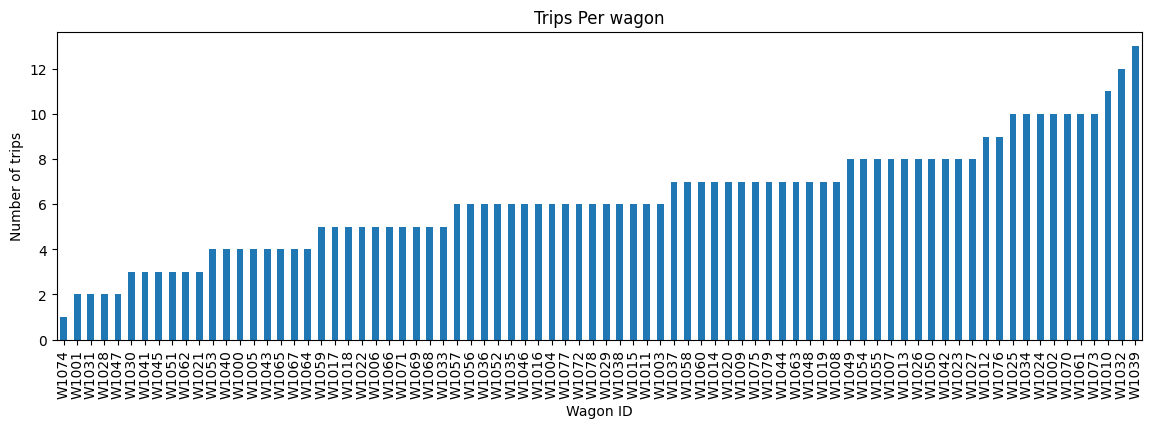

In [ ]:
trips_per_wagon = trip_df.groupby('wagon_id')['trip_id'].count().sort_values()
trips_per_wagon.plot(kind="bar",figsize=(14,4))
plt.title('Trips Per wagon')
plt.xlabel('Wagon ID')
plt.ylabel("Number of trips")
plt.show()

In [ ]:
trip_df['departure_time'] = pd.to_datetime(trip_df['departure_time'])
trip_df['arrival_time'] = pd.to_datetime(trip_df['arrival_time'])

trips_sorted = trip_df.sort_values(["wagon_id", "departure_time"])
trips_sorted["idle_hours"] = (
    trips_sorted["departure_time"] -
    trips_sorted.groupby("wagon_id")["arrival_time"].shift(1)
).dt.total_seconds()/3600

In [ ]:
trips_sorted

,trip_id,wagon_id,route_id,departure_time,arrival_time,planned_duration_hrs,actual_duration_hrs,trip_status,delay_hr,is_delayed,trip_year,trip_month,trip_day,idle_hours
283,T5283,W1000,R100,2024-01-18,2024-01-20,60,54,Completed,-6,No,2024,1,18,NaN
8,T5008,W1000,R113,2024-05-19,2024-05-22,69,81,Delayed,12,Yes,2024,5,19,2880.0
111,T5111,W1000,R118,2024-10-14,2024-10-16,49,55,Delayed,6,Yes,2024,10,14,3480.0
244,T5244,W1000,R104,2024-12-17,2024-12-19,45,57,Delayed,12,Yes,2024,12,17,1488.0
247,T5247,W1001,R103,2024-05-30,2024-06-02,84,78,Completed,-6,No,2024,5,30,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,T5460,W1079,R110,2024-08-05,2024-08-07,59,65,Delayed,6,Yes,2024,8,5,2232.0
292,T5292,W1079,R113,2024-08-09,2024-08-13,96,108,Delayed,12,Yes,2024,8,9,48.0
259,T5259,W1079,R110,2024-09-08,2024-09-11,62,74,Delayed,12,Yes,2024,9,8,624.0
322,T5322,W1079,R100,2024-09-13,2024-09-14,49,43,Completed,-6,No,2024,9,13,48.0
